## 1. Importing libraries

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## 2. Load the Iris Dataset

In [13]:
iris = load_iris()
X = iris["data"]
# X = iris.data
y = iris["target"]
# y = iris.target

## 3. Exploring the Dataset

In [14]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df = pd.DataFrame(
    data=np.c_[X, y], # Concatenates X and y
    # columns=iris["feature_names"] + ["species"] # Columns names for X and y
    columns=["sepal_length"] + ["sepal_width"] + ["petal_length"] + ["petal_width"] + ["species"] # Columns names for X and y
)

In [17]:
# df.head()
# df.tail()
df.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,species
89,5.5,2.5,4.0,1.3,1.0
11,4.8,3.4,1.6,0.2,0.0
112,6.8,3.0,5.5,2.1,2.0
100,6.3,3.3,6.0,2.5,2.0
140,6.7,3.1,5.6,2.4,2.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [19]:
df.loc[21]

sepal_length    5.1
sepal_width     3.7
petal_length    1.5
petal_width     0.4
species         0.0
Name: 21, dtype: float64

In [20]:
df.loc[21, "sepal_length"], df.loc[51, "petal_width"]

(5.1, 1.5)

In [21]:
df.iloc[[21, 55]]

,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,0.0
55,5.7,2.8,4.5,1.3,1.0


In [22]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 5. Visualize the Dataset

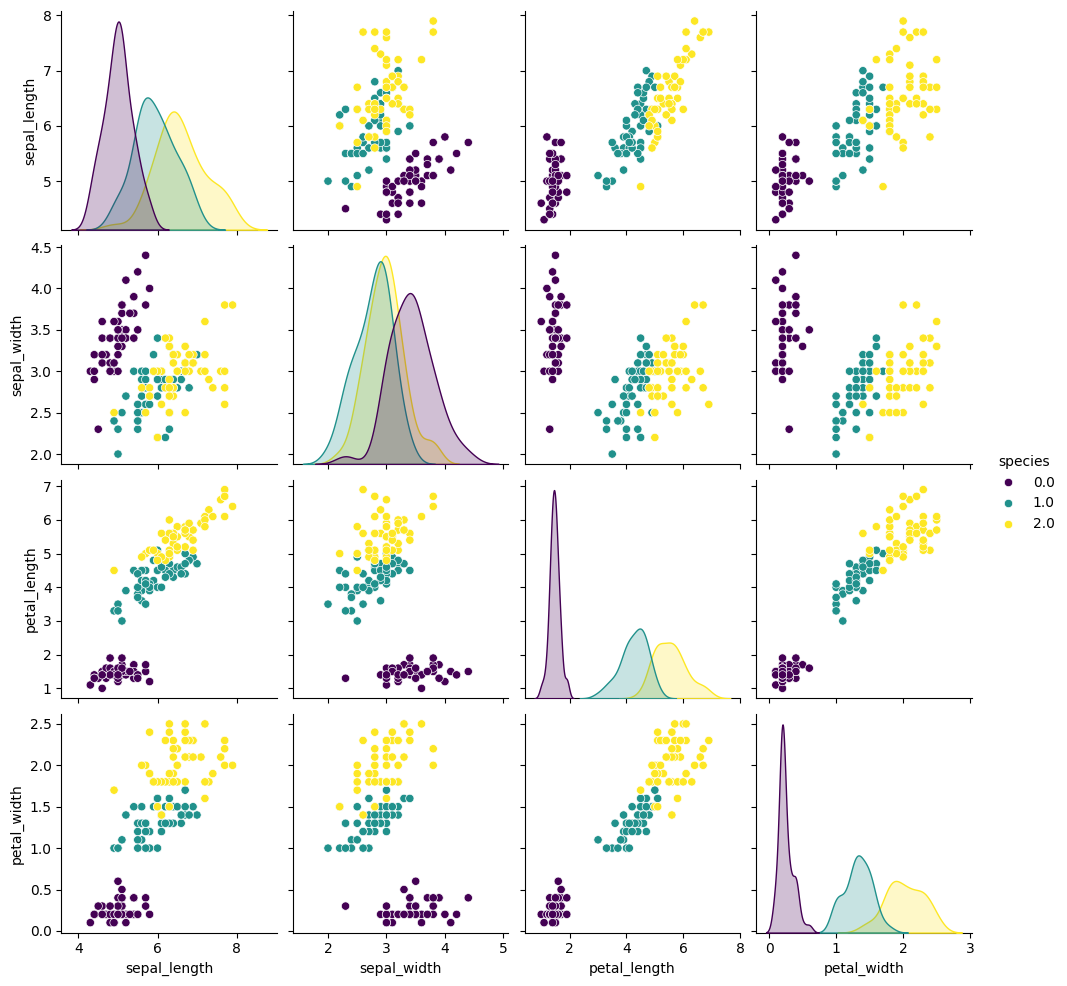

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.pairplot(df, x_vars=["sepal_length", "petal_width"], y_vars=["sepal_width"])
# sns.pairplot(df, hue="species", diag_kind='kde', palette="viridis")
# sns.pairplot(df, hue="species", palette="viridis", corner=True)
sns.pairplot(df, hue="species", palette="viridis")
plt.show()


## 6. Preprocessing the Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=17)

In [25]:
len(X_train), len(X_train), len(y_test), len(y_test)

(120, 120, 30, 30)

## 7. Build and Train the Model

In [26]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
model_rfc = RandomForestClassifier(random_state=17)
model_rfc.fit(X=X_train, y=y_train)

RandomForestClassifier(random_state=17)

In [29]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [30]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

## 8. Make Predictions

In [31]:
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

## 9. Evaluate the Model

In [32]:
print(f"accuracy_lr: {accuracy_score(y_test, y_pred_lr)}")
print(f"accuracy_dt: {accuracy_score(y_test, y_pred_dt)}")
print(f"accuracy_rfc: {accuracy_score(y_test, y_pred_rfc)}")
print(f"accuracy_svm: {accuracy_score(y_test, y_pred_svm)}")
print(f"accuracy_knn: {accuracy_score(y_test, y_pred_knn)}")

accuracy_lr: 0.9666666666666667
accuracy_dt: 1.0
accuracy_rfc: 0.9666666666666667
accuracy_svm: 0.9666666666666667
accuracy_knn: 0.9333333333333333


In [33]:
print(f"report_lr:\n{classification_report(y_true=y_test, y_pred=y_pred_lr, target_names=iris['target_names'])}")

report_lr:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
print(f"report_dt:\n{classification_report(y_true=y_test, y_pred=y_pred_dt, target_names=iris['target_names'])}")

report_dt:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print(f"report_rfc:\n{classification_report(y_true=y_test, y_pred=y_pred_rfc, target_names=iris['target_names'])}")

report_rfc:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [36]:
print(f"report_svm:\n{classification_report(y_true=y_test, y_pred=y_pred_svm, target_names=iris['target_names'])}")

report_svm:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.92      1.00      0.96        11
   virginica       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [37]:
print(f"report_knn:\n{classification_report(y_true=y_test, y_pred=y_pred_knn, target_names=iris['target_names'])}")

report_knn:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

